# Interpretabilidad

<a href="https://colab.research.google.com/github/andrescastro-itm/IA_ITM_2025-2/blob/main/Clase28/Interpretabilidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carga de datos y entrenamiento de modelo

In [2]:
df_logistic_regression2 = pd.read_csv("data.csv",index_col=0)
df_logistic_regression2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_logistic_regression2 = df_logistic_regression2.drop(columns=['Unnamed: 32'])

In [4]:
df_logistic_regression2 = pd.get_dummies(df_logistic_regression2, columns=['diagnosis'], dtype=int,  drop_first=True)

In [5]:
X2 = df_logistic_regression2.drop(columns='diagnosis_M', axis=1).values
y2 = df_logistic_regression2['diagnosis_M'].values

In [6]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)

In [7]:
scaler = MinMaxScaler()

In [8]:
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X2_train, y2_train)

y_pred = logreg.predict(X2_test)

In [10]:
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Local Interpretable Model-Agnostic Explanations (LIME)
https://github.com/marcotcr/lime

In [11]:
import lime
from lime import lime_tabular

In [12]:
feature_names = list(df_logistic_regression2.drop(columns='diagnosis_M', axis=1).columns)

In [13]:
feature_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [14]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data = X2_train,
    feature_names = feature_names,
    mode = 'classification',
    class_names = ['M', 'B'],
    feature_selection = 'highest_weights',
    discretize_continuous=False
)

In [15]:
import numpy as np

In [16]:
np.arange(y_pred.shape[0])[y_pred != y2_test] #identificar índices de errores

array([ 21,  51,  91, 148, 159])

In [17]:
idx = 51
labtoname = {0:'M', 1:'B'}

print(f'Etiqueta Real: {labtoname[int(y2_test[idx])]}')

exp = interpretor.explain_instance(
    data_row = X2_test[idx],
    predict_fn = logreg.predict_proba
)

exp.show_in_notebook(show_table=True, show_all = False)

Etiqueta Real: B


## SHapley Additive exPlanations (SHAP)
https://github.com/shap/shap

In [18]:
import shap
import matplotlib.pyplot as plt

In [19]:
explainer = shap.Explainer(
    logreg,
    X2_train,
    feature_names = feature_names
)

In [20]:
shap_values = explainer(X2_test)
shap.initjs()

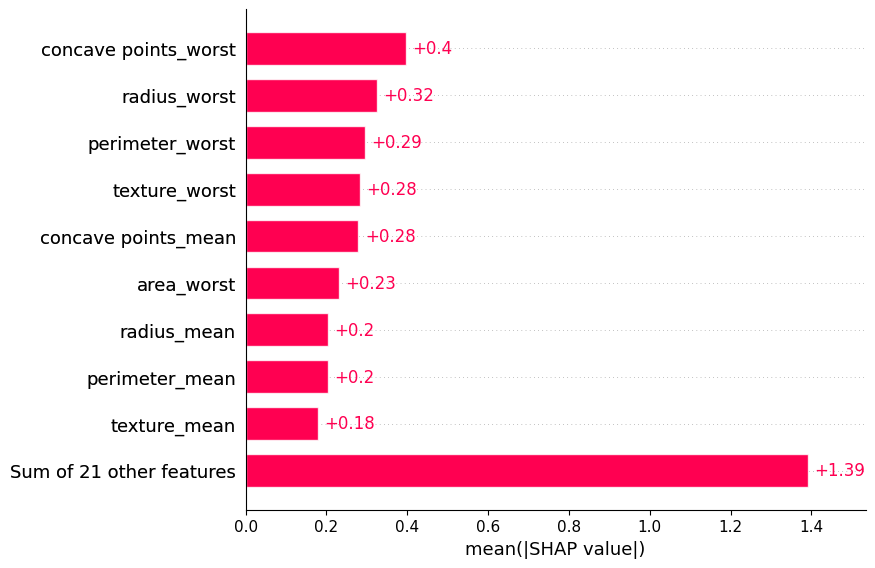

In [21]:
shap.plots.bar(shap_values)

Gráfica de importancia por Variable - Interpretación Global


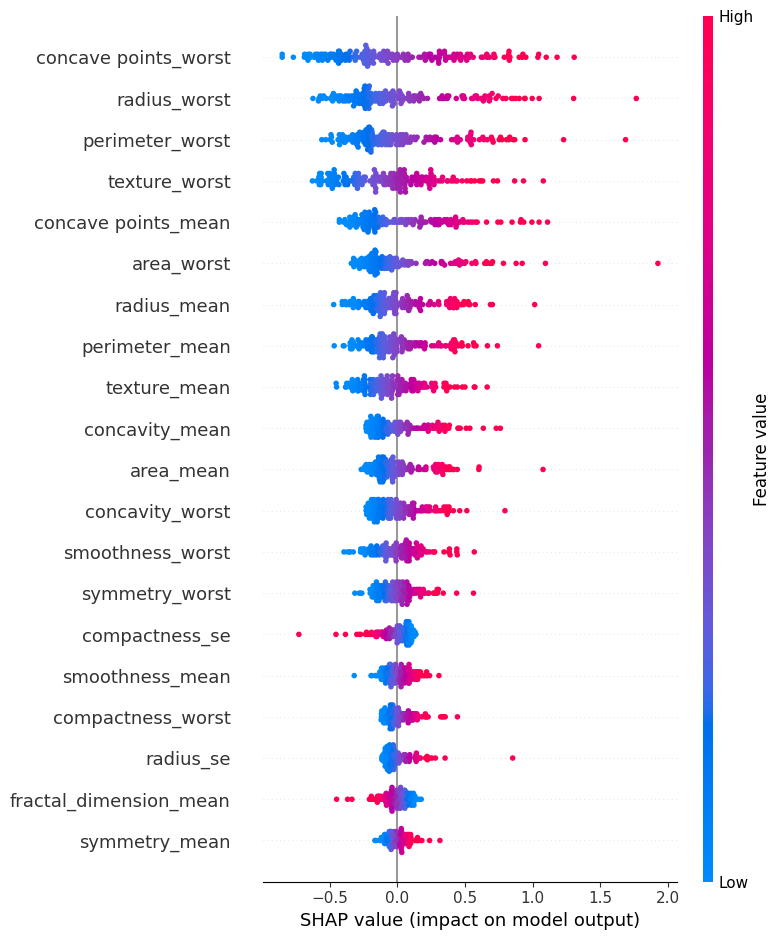

In [22]:
print("Gráfica de importancia por Variable - Interpretación Global")
figure = plt.figure()
shap.summary_plot(shap_values, X2_test)

In [23]:
ind = 51
print(f'etiqueta real: {labtoname[y2_test[ind]]}')
print(f'etiqueta predicha: {labtoname[logreg.predict((X2_test[ind]).reshape(-1,30))[0]]}')

shap.plots.force(shap_values[ind])

etiqueta real: B
etiqueta predicha: M


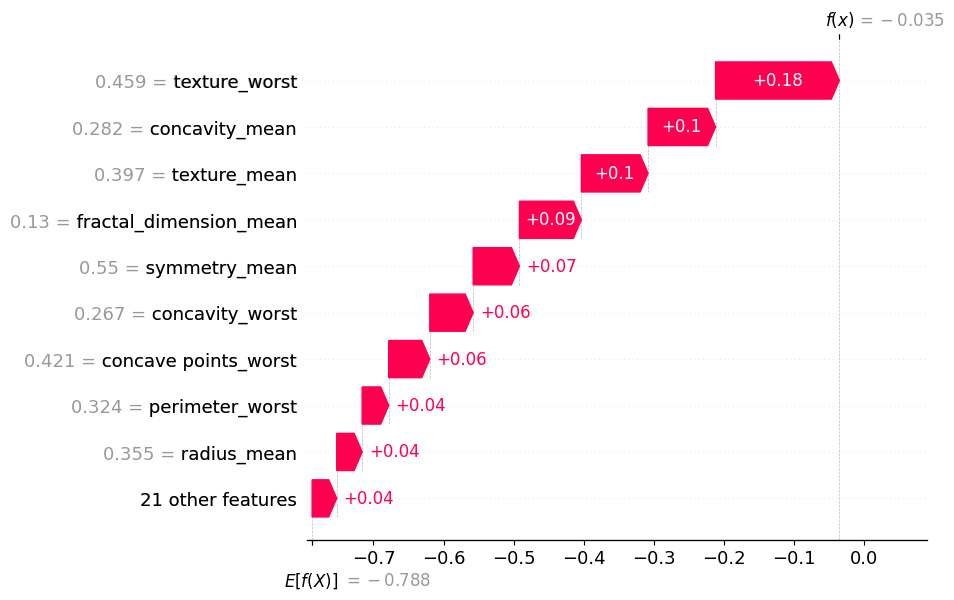

In [24]:
shap.plots.waterfall(shap_values[ind])

In [25]:
shap.plots.force(shap_values[:100])

### Para redes neuronales profundas: grad-cam https://github.com/jacobgil/pytorch-grad-cam